In [20]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('credit_card_churn.csv')

print("Dataset shape:", df.shape)
print(df.head())

# Explanation:
# We load the dataset and check basic shape and first rows
# to ensure it loaded correctly.

Dataset shape: (10127, 23)
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777  

In [22]:
print("\nMissing values per column:\n", df.isnull().sum())

# Explanation:
# We check for any missing (null) values in each column.



Missing values per column:
 CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category    

In [23]:
print(df.dtypes)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [24]:
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Explanation:
# We check for duplicated rows that could distort analysis.



Number of duplicated rows: 0


In [25]:
print("\nUnique value counts per column:\n", df.nunique())

# Explanation:
# We check how many distinct values each column has
# to detect constants, binary dummies, and feature types.


Unique value counts per column:
 CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                

In [26]:
df = df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])

# Explanation:
# We drop columns that are irrelevant or would leak information into the model
# (like system-generated predictions).

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])

# Explanation:
# We turn the target variable into binary format for classification.


In [28]:
print("\nClass balance:\n", df['Attrition_Flag'].value_counts(normalize=True))

# Explanation:
# We check if the dataset is imbalanced — this helps explain model performance
# and could inform using class weights in models.



Class balance:
 Attrition_Flag
1    0.83934
0    0.16066
Name: proportion, dtype: float64


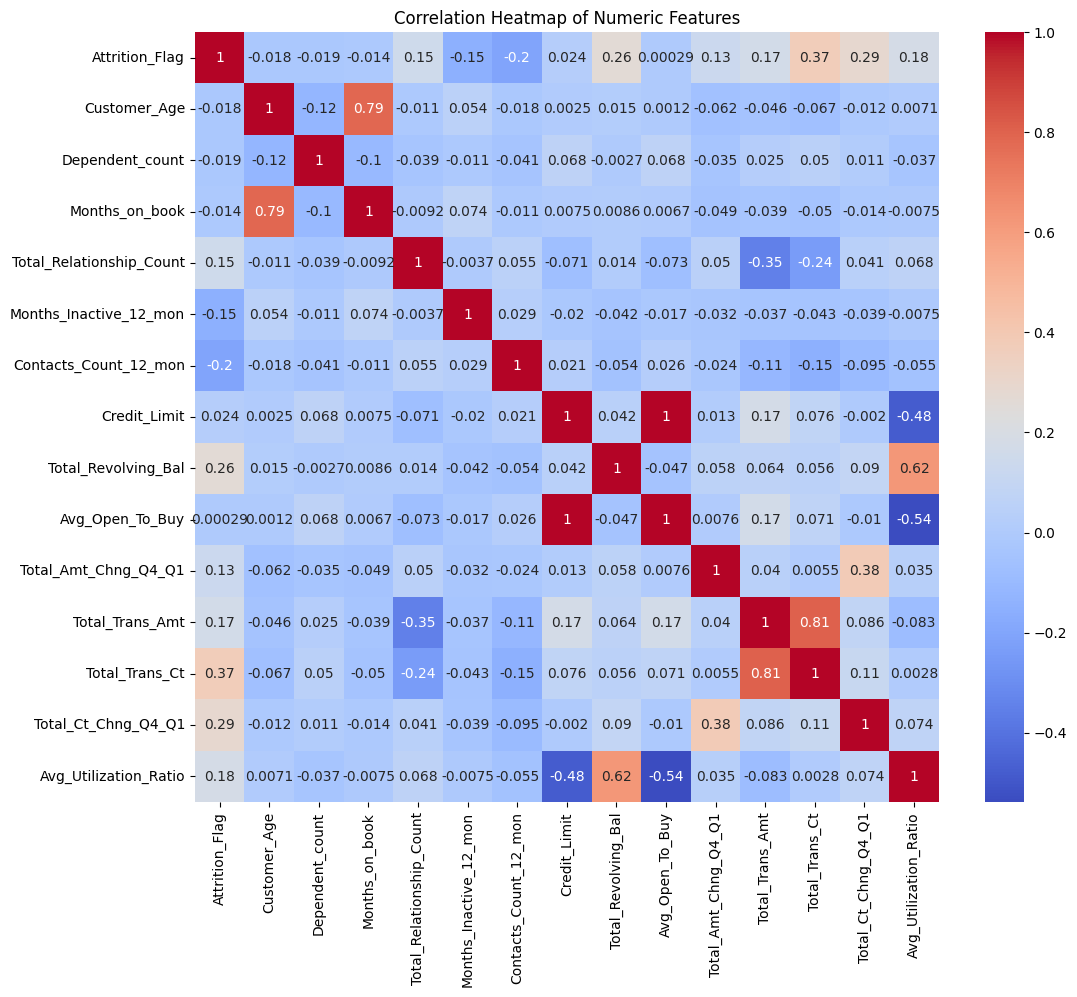

In [29]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Explanation:
# We visualize how strongly numeric features relate to each other
# and to the target (Attrition_Flag). Highly correlated predictors
# may need to be pruned to avoid redundancy.


In [30]:
# Pair 1: Total_Trans_Amt vs. Total_Trans_Ct
from scipy import stats
r1, p1 = stats.pearsonr(df['Total_Trans_Amt'], df['Total_Trans_Ct'])
print(f"Total_Trans_Amt vs. Total_Trans_Ct r: {r1:.2f}, p-value: {p1:.4f}")

# Pair 2: Credit_Limit vs. Avg_Open_To_Buy
r2, p2 = stats.pearsonr(df['Credit_Limit'], df['Avg_Open_To_Buy'])
print(f"Credit_Limit vs. Avg_Open_To_Buy r: {r2:.2f}, p-value: {p2:.4f}")

# Pair 3: Customer_Age vs. Months_on_book
r3, p3 = stats.pearsonr(df['Customer_Age'], df['Months_on_book'])
print(f"Customer_Age vs. Months_on_book r: {r3:.2f}, p-value: {p3:.4f}")

# Explanation:
# We test specific pairs identified in the heatmap for both correlation strength and statistical significance.


Total_Trans_Amt vs. Total_Trans_Ct r: 0.81, p-value: 0.0000
Credit_Limit vs. Avg_Open_To_Buy r: 1.00, p-value: 0.0000
Customer_Age vs. Months_on_book r: 0.79, p-value: 0.0000


In [31]:
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding shape:", df.shape)

# Explanation:
# We convert categorical variables into binary indicators for modeling.

Data after one-hot encoding shape: (10127, 33)


In [32]:
sparse_dummies = []
for col in df.columns:
    if df[col].nunique() == 2:
        if df[col].value_counts(normalize=True).min() < 0.01:
            sparse_dummies.append(col)

print("Sparse dummy variables (<1%):", sparse_dummies)

# Explanation:
# We identify dummy variables where the minority class is extremely rare
# and consider dropping them.

Sparse dummy variables (<1%): ['Card_Category_Platinum']


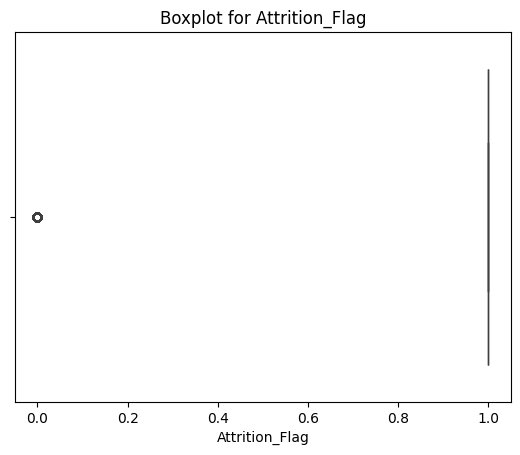

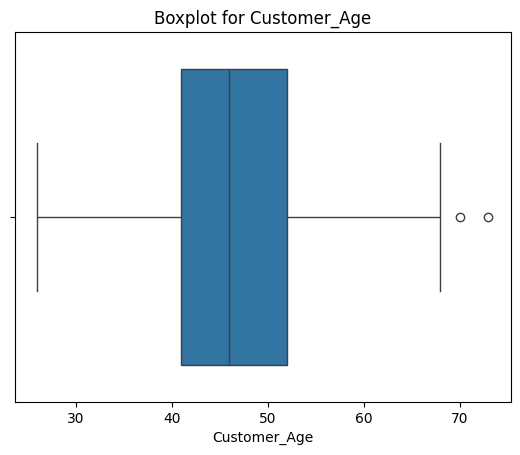

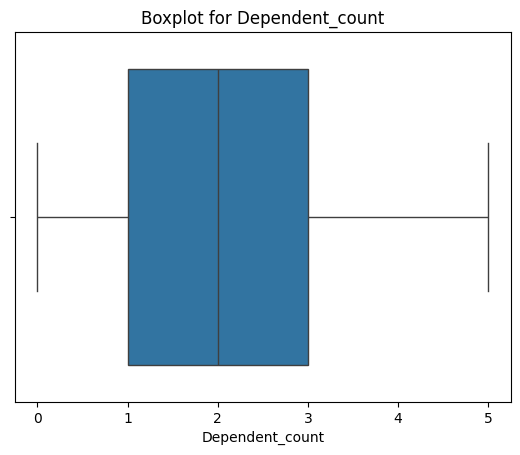

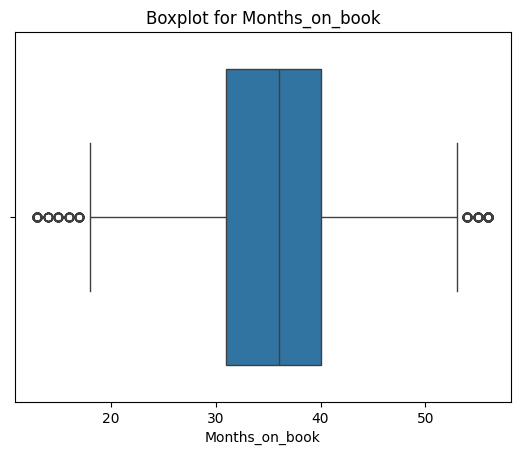

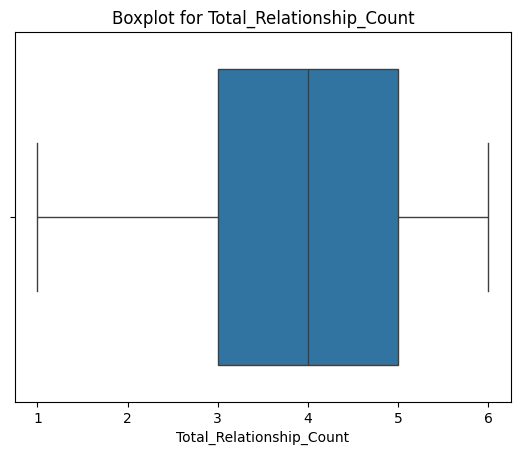

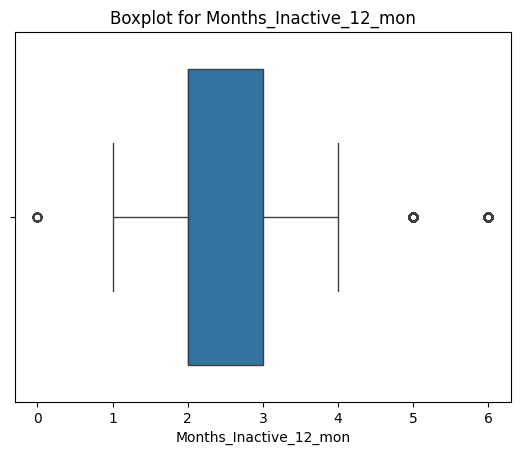

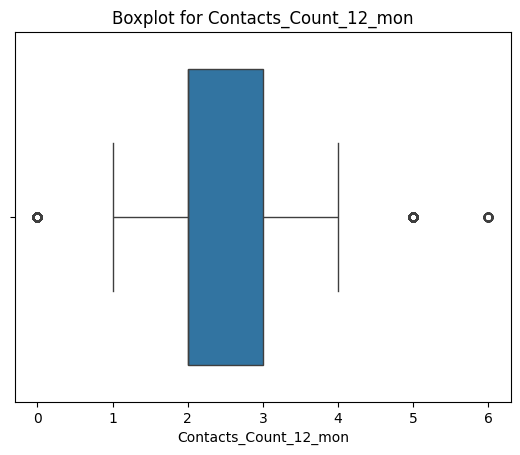

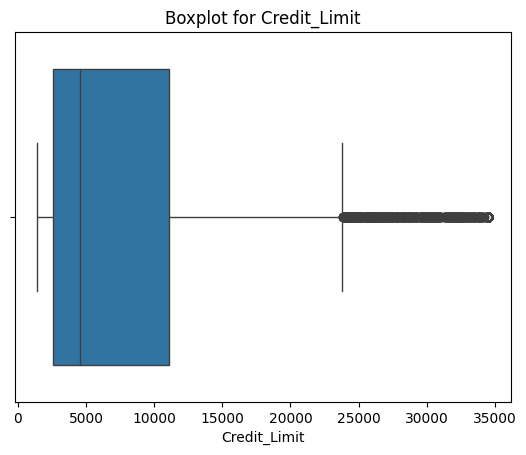

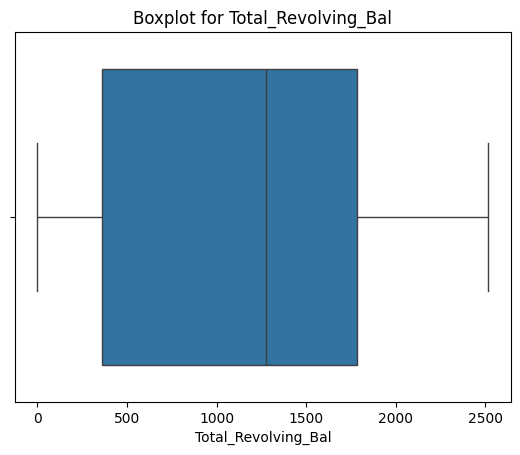

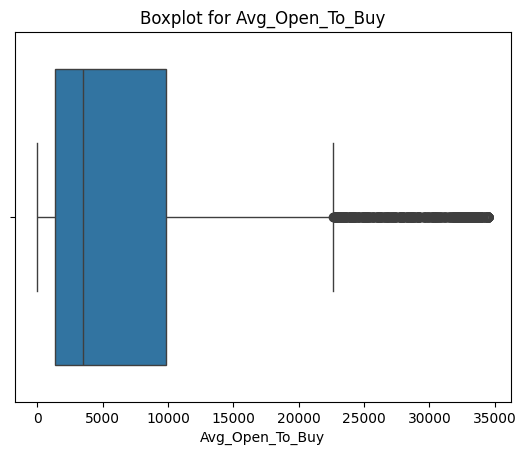

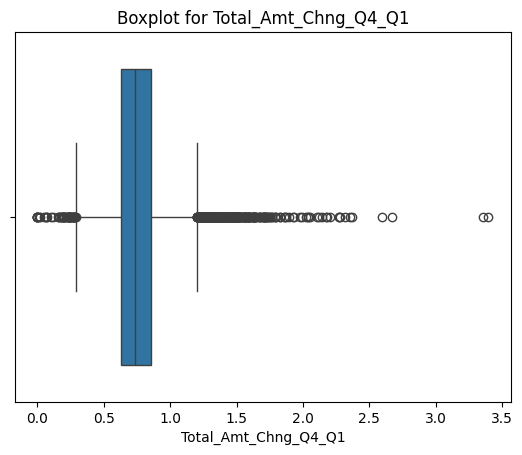

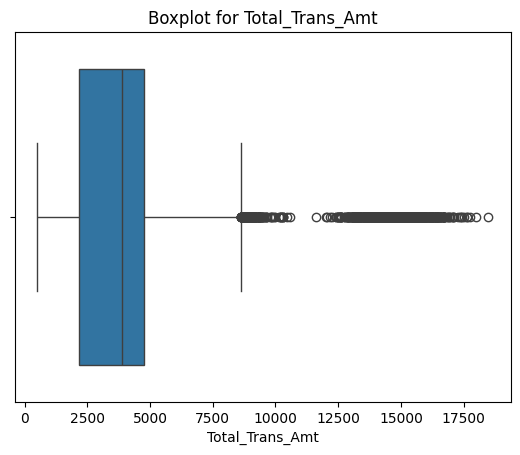

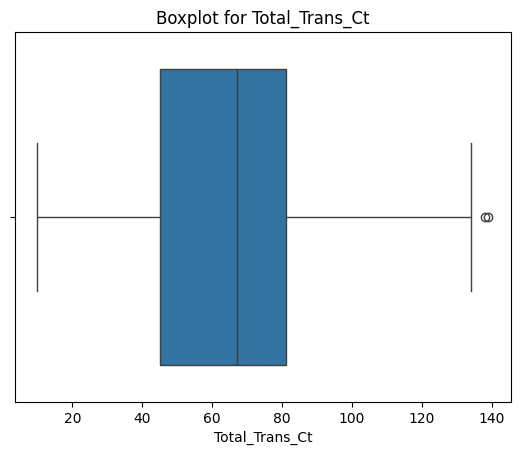

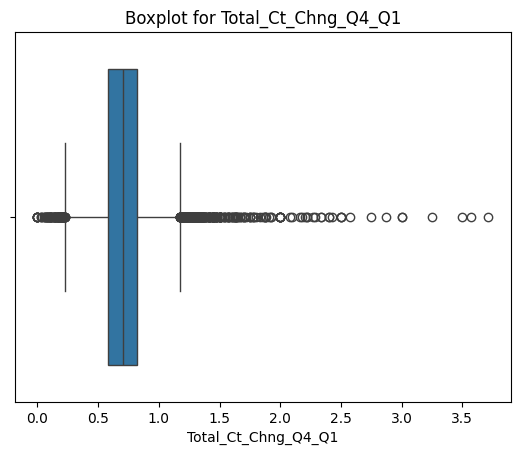

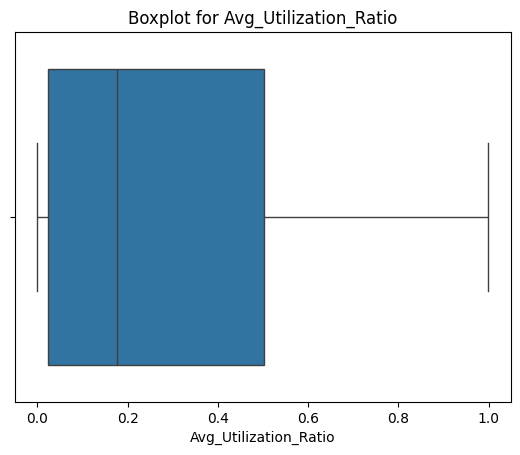

In [33]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Explanation:
# Visually inspect numeric columns for extreme outliers.


In [34]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Attrition_Flag')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Explanation:
# We standardize numeric variables to mean = 0, std = 1 —
# this is essential for models like Logistic Regression, KNN, and SVM.

In [35]:
# Full feature set
X_all = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Reduced feature set (dropping Avg_Open_To_Buy, which is perfectly correlated with Credit_Limit)
X_reduced = df.drop(columns=['Attrition_Flag', 'Avg_Open_To_Buy', 'Card_Category_Platinum'])

# Explanation:
# We prepare two datasets: one with all features, and one reduced by dropping
# Avg_Open_To_Buy (since it’s perfectly correlated with Credit_Limit)
# and Card_Category_Platinum (likely too sparse or not useful).


In [36]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y, test_size=0.3, stratify=y, random_state=42)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y, test_size=0.3, stratify=y, random_state=42)


# Explanation:
# We split both datasets into 70% training and 30% testing sets, ensuring the class
# proportions are preserved in both.


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, jaccard_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split


In [40]:
# Full Dataset

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_all, y_train_all)
y_pred_logreg_all = logreg.predict(X_test_all)

print("\nLogistic Regression (Full Dataset)")
print("Accuracy:", accuracy_score(y_test_all, y_pred_logreg_all))
print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred_logreg_all))
print("Classification Report:\n", classification_report(y_test_all, y_pred_logreg_all))
jaccard_all = jaccard_score(y_test_all, y_pred_logreg_all)
print(f"Jaccard Index: {jaccard_all:.4f}")

# Explanation:
# We train the model on all available features (full dataset)
# and evaluate its performance on accuracy, confusion matrix,
# classification metrics (precision, recall, f1-score), and Jaccard index.

# Reduced Dataset
logreg.fit(X_train_red, y_train_red)
y_pred_logreg_red = logreg.predict(X_test_red)

print("\nLogistic Regression (Reduced Dataset)")
print("Accuracy:", accuracy_score(y_test_red, y_pred_logreg_red))
print("Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_logreg_red))
print("Classification Report:\n", classification_report(y_test_red, y_pred_logreg_red))
jaccard_red = jaccard_score(y_test_red, y_pred_logreg_red)
print(f"Jaccard Index: {jaccard_red:.4f}")

# Explanation:
# We repeat the same evaluation on a reduced feature set,
# which typically includes only the most important or selected variables.
# This helps check if simplifying the model maintains or improves performance.



Logistic Regression (Full Dataset)
Accuracy: 0.8973346495557749
Confusion Matrix:
 [[ 265  223]
 [  89 2462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.54      0.63       488
           1       0.92      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.83      0.75      0.78      3039
weighted avg       0.89      0.90      0.89      3039

Jaccard Index: 0.8875

Logistic Regression (Reduced Dataset)
Accuracy: 0.8973346495557749
Confusion Matrix:
 [[ 265  223]
 [  89 2462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.54      0.63       488
           1       0.92      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.83      0.75      0.78      3039
weighted avg       0.89      0.90      0.89      3039

Jaccard Index: 0.8875


In [41]:
# Logistic Regression - Reduced Dataset
train_acc_log = logreg.score(X_train_red, y_train_red)
test_acc_log = logreg.score(X_test_red, y_test_red)
print(f"Logistic Regression (Reduced) - Train Accuracy: {train_acc_log:.4f}, Test Accuracy: {test_acc_log:.4f}")


Logistic Regression (Reduced) - Train Accuracy: 0.9082, Test Accuracy: 0.8973



Decision Tree (Full Dataset)
Accuracy: 0.9358341559723593
Confusion Matrix:
 [[ 390   98]
 [  97 2454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       488
           1       0.96      0.96      0.96      2551

    accuracy                           0.94      3039
   macro avg       0.88      0.88      0.88      3039
weighted avg       0.94      0.94      0.94      3039


Decision Tree (Reduced Dataset)
Accuracy: 0.9361632115827575
Confusion Matrix:
 [[ 383  105]
 [  89 2462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       488
           1       0.96      0.97      0.96      2551

    accuracy                           0.94      3039
   macro avg       0.89      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



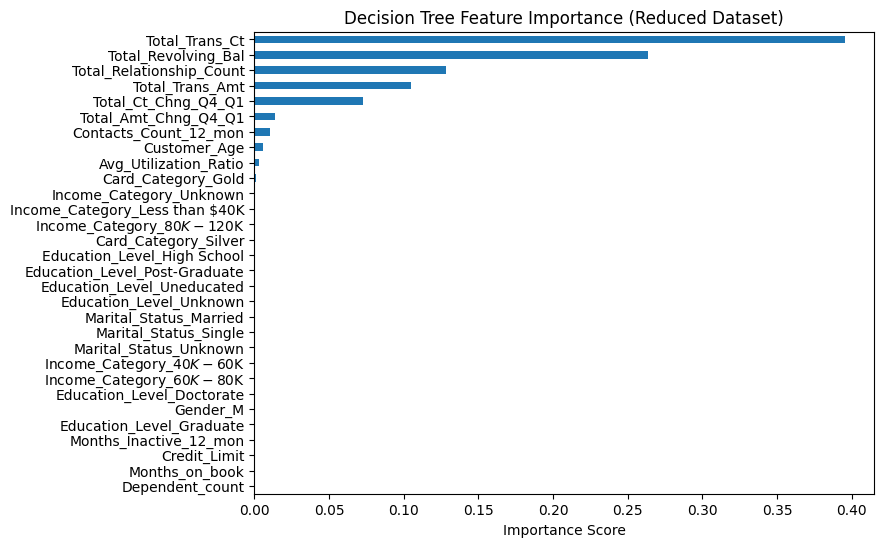

In [42]:

# Decision Tree on Full Dataset
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_all, y_train_all)
y_pred_dtree_all = dtree.predict(X_test_all)

print("\nDecision Tree (Full Dataset)")
print("Accuracy:", accuracy_score(y_test_all, y_pred_dtree_all))
print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred_dtree_all))
print("Classification Report:\n", classification_report(y_test_all, y_pred_dtree_all))

# Explanation:
# We train and evaluate the decision tree on the full feature set,
# reporting standard performance metrics.

# Decision Tree on Reduced Dataset
dtree.fit(X_train_red, y_train_red)
y_pred_dtree_red = dtree.predict(X_test_red)

print("\nDecision Tree (Reduced Dataset)")
print("Accuracy:", accuracy_score(y_test_red, y_pred_dtree_red))
print("Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_dtree_red))
print("Classification Report:\n", classification_report(y_test_red, y_pred_dtree_red))

# Explanation:
# We repeat the evaluation on a reduced feature set,
# which can help simplify the model without sacrificing too much performance.

# Feature Importance Plot (Reduced Dataset)
importances = pd.Series(dtree.feature_importances_, index=X_train_red.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Decision Tree Feature Importance (Reduced Dataset)')
plt.xlabel('Importance Score')
plt.show()

# Explanation:
# This plot shows which features contributed most to the tree’s decisions.

In [43]:
# Decision Tree - Reduced Dataset
train_acc_tree = dtree.score(X_train_red, y_train_red)
test_acc_tree = dtree.score(X_test_red, y_test_red)
print(f"Decision Tree (Reduced) - Train Accuracy: {train_acc_tree:.4f}, Test Accuracy: {test_acc_tree:.4f}")

Decision Tree (Reduced) - Train Accuracy: 0.9417, Test Accuracy: 0.9362


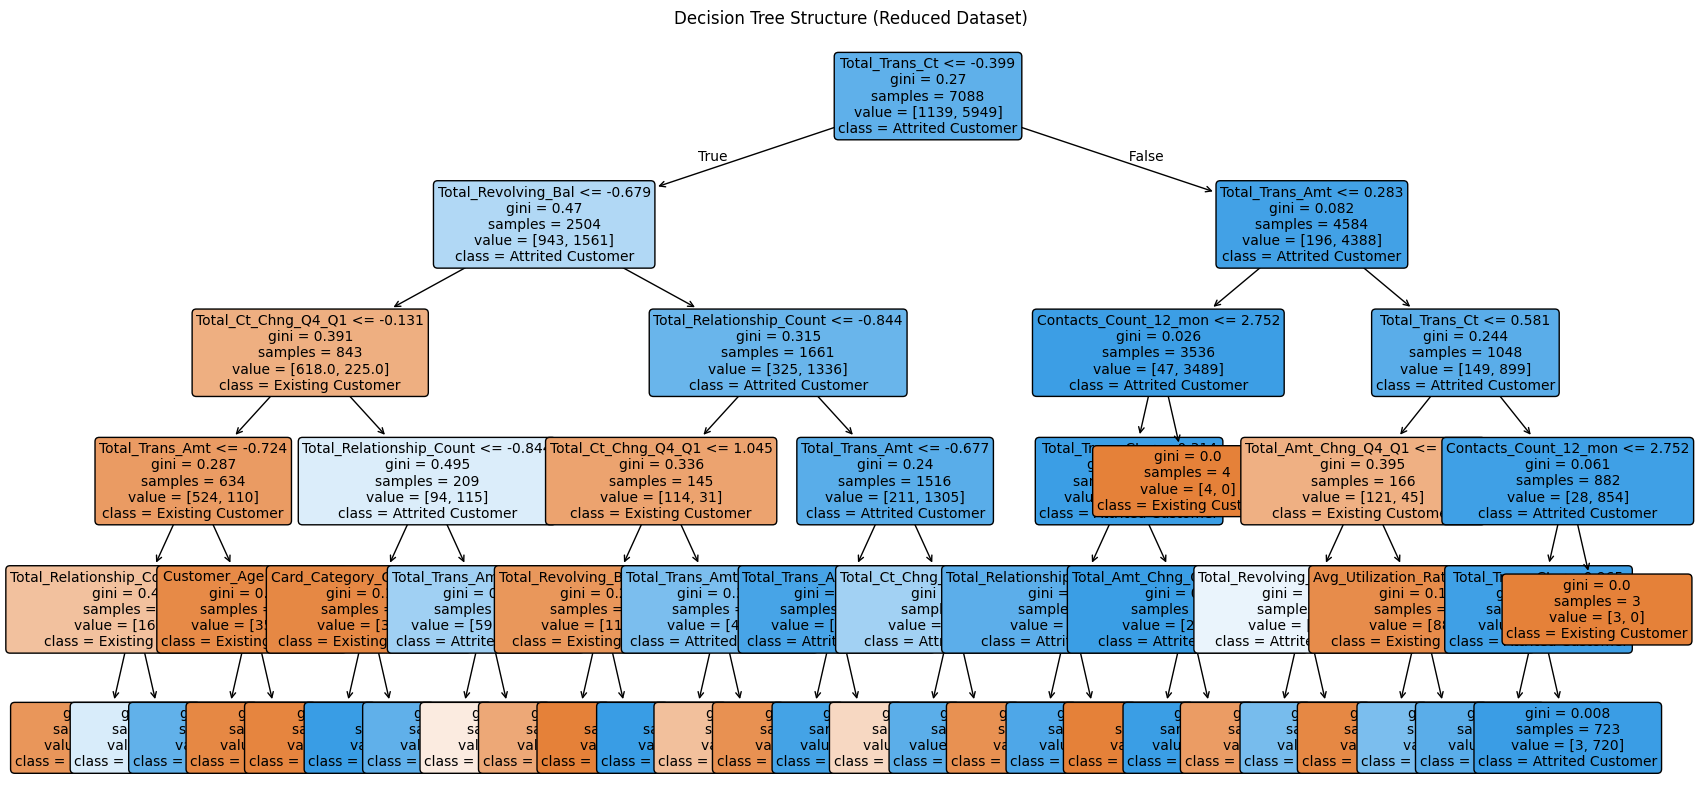

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(dtree,
          feature_names=X_train_red.columns,
          class_names=['Existing Customer', 'Attrited Customer'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title('Decision Tree Structure (Reduced Dataset)')
plt.show()


In [46]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Explanation:
# We apply K-Nearest Neighbors (KNN) to both full and reduced datasets.
# We loop over K (1–20) to find the best-performing K and then evaluate final performance.

#  FULL DATASET
print("\nKNN (Full Dataset)")
best_k_full = 1
best_accuracy_full = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_all, y_train_all)
    accuracy = knn.score(X_test_all, y_test_all)
    if accuracy > best_accuracy_full:
        best_k_full = k
        best_accuracy_full = accuracy

print(f"Best K on full dataset: {best_k_full}")

# Final KNN model (full dataset)
knn_full = KNeighborsClassifier(n_neighbors=best_k_full)
knn_full.fit(X_train_all, y_train_all)
y_pred_knn_full = knn_full.predict(X_test_all)

print("Accuracy:", accuracy_score(y_test_all, y_pred_knn_full))
print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred_knn_full))
print("Classification Report:\n", classification_report(y_test_all, y_pred_knn_full))


#  REDUCED DATASET
print("\nKNN (Reduced Dataset)")
best_k_red = 1
best_accuracy_red = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_red, y_train_red)
    accuracy = knn.score(X_test_red, y_test_red)
    if accuracy > best_accuracy_red:
        best_k_red = k
        best_accuracy_red = accuracy

print(f"Best K on reduced dataset: {best_k_red}")

# Final KNN model (reduced dataset)
knn_red = KNeighborsClassifier(n_neighbors=best_k_red)
knn_red.fit(X_train_red, y_train_red)
y_pred_knn_red = knn_red.predict(X_test_red)

print("Accuracy:", accuracy_score(y_test_red, y_pred_knn_red))
print("Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_knn_red))
print("Classification Report:\n", classification_report(y_test_red, y_pred_knn_red))

# Explanation:
# We perform K tuning by testing K from 1 to 20 and selecting the one giving the highest test accuracy.




KNN (Full Dataset)
Best K on full dataset: 6
Accuracy: 0.9095097071405067
Confusion Matrix:
 [[ 307  181]
 [  94 2457]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.69       488
           1       0.93      0.96      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.85      0.80      0.82      3039
weighted avg       0.90      0.91      0.91      3039


KNN (Reduced Dataset)
Best K on reduced dataset: 6
Accuracy: 0.9111549851924975
Confusion Matrix:
 [[ 314  174]
 [  96 2455]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.64      0.70       488
           1       0.93      0.96      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.85      0.80      0.82      3039
weighted avg       0.91      0.91      0.91      3039



In [ ]:
train_acc_knn_red = knn_red.score(X_train_red, y_train_red)
test_acc_knn_red = knn_red.score(X_test_red, y_test_red)
print(f"KNN (Reduced) - Train Accuracy: {train_acc_knn_red:.4f}, Test Accuracy: {test_acc_knn_red:.4f}")


KNN (Reduced) - Train Accuracy: 0.9381, Test Accuracy: 0.9112


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Explanation:
# We apply SVM using both linear and RBF kernels.
# We evaluate performance on both the full and reduced datasets.

kernels = ['linear', 'rbf']

for kernel in kernels:
    print(f"\nSVM with {kernel} kernel (Full Dataset)")
    svm_model = SVC(kernel=kernel, probability=True, random_state=42)
    svm_model.fit(X_train_all, y_train_all)
    y_pred_svm_all = svm_model.predict(X_test_all)
    print("Accuracy:", accuracy_score(y_test_all, y_pred_svm_all))
    print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred_svm_all))
    print("Classification Report:\n", classification_report(y_test_all, y_pred_svm_all))

    print(f"\nSVM with {kernel} kernel (Reduced Dataset)")
    svm_model.fit(X_train_red, y_train_red)
    y_pred_svm_red = svm_model.predict(X_test_red)
    print("Accuracy:", accuracy_score(y_test_red, y_pred_svm_red))
    print("Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_svm_red))
    print("Classification Report:\n", classification_report(y_test_red, y_pred_svm_red))

#  Explanation:
# We test two kernel types:
# Linear: for linearly separable data.
# RBF: for non-linear relationships.



SVM with linear kernel (Full Dataset)
Accuracy: 0.9006252056597565
Confusion Matrix:
 [[ 264  224]
 [  78 2473]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.54      0.64       488
           1       0.92      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.84      0.76      0.79      3039
weighted avg       0.89      0.90      0.89      3039


SVM with linear kernel (Reduced Dataset)
Accuracy: 0.8993089832181639
Confusion Matrix:
 [[ 262  226]
 [  80 2471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.54      0.63       488
           1       0.92      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.84      0.75      0.79      3039
weighted avg       0.89      0.90      0.89      3039


SVM with rbf kernel (Full Dataset)
Accuracy: 0.930898321816387
Con

In [48]:
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_red, y_train_red)

SVC(probability=True, random_state=42)

In [50]:
# SVM RBF - Reduced Dataset
train_acc_svm = svm_rbf.score(X_train_red, y_train_red)
test_acc_svm = svm_rbf.score(X_test_red, y_test_red)
print(f"SVM RBF (Reduced) - Train Accuracy: {train_acc_svm:.4f}, Test Accuracy: {test_acc_svm:.4f}")


SVM RBF (Reduced) - Train Accuracy: 0.9522, Test Accuracy: 0.9335


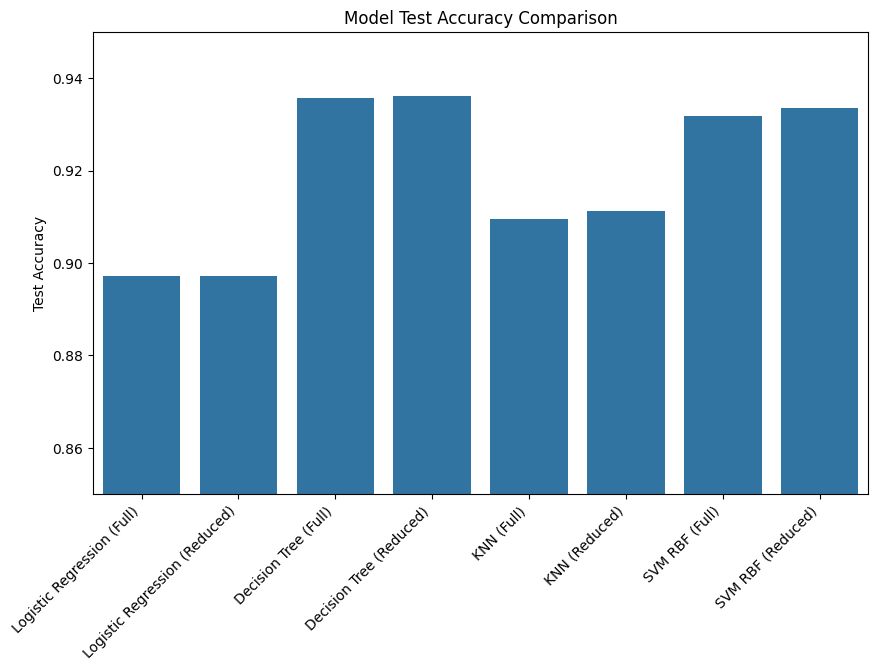

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


model_names = [
    'Logistic Regression (Full)', 'Logistic Regression (Reduced)',
    'Decision Tree (Full)', 'Decision Tree (Reduced)',
    'KNN (Full)', 'KNN (Reduced)',
    'SVM RBF (Full)', 'SVM RBF (Reduced)'
]

accuracy_scores = [
    0.8973, 0.8973,    # Logistic Regression
    0.9358, 0.9362,    # Decision Tree
    0.9095, 0.9112,    # KNN
    0.9319, 0.9335     # SVM RBF (best-performing kernel)
]

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores)
plt.ylim(0.85, 0.95)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Model Test Accuracy Comparison')
plt.show()

# Explanation:
# This bar plot provides a visual comparison of the models' test accuracies.
# It helps identify which combination of model type and feature set performed best.



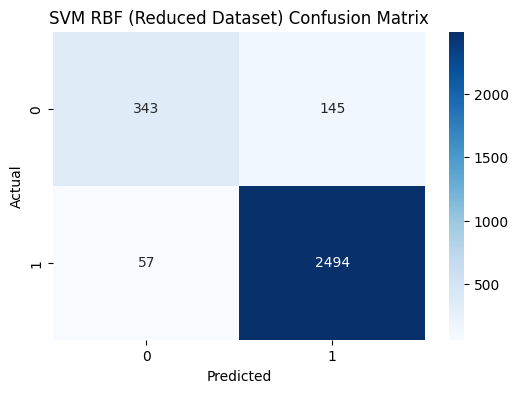

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# We fit the best-performing SVM (RBF kernel) on the reduced dataset
# and visualize its confusion matrix to assess classification performance.

y_pred_svm_red = svm_rbf.predict(X_test_red)


cm_svm = confusion_matrix(y_test_red, y_pred_svm_red)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM RBF (Reduced Dataset) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Explanation:
# The confusion matrix shows the number of correct and incorrect predictions,
# divided into true positives, false positives, true negatives, and false negatives.



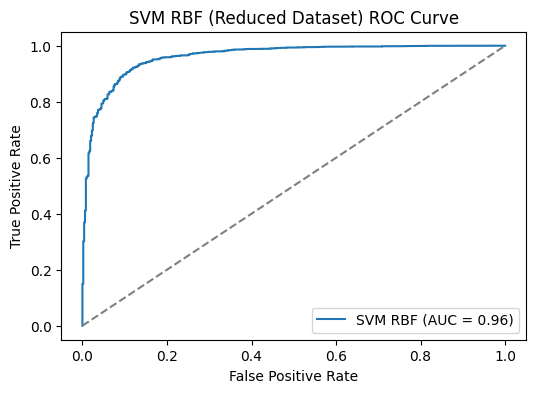

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Explanation:
# We calculate and plot the ROC curve for the SVM RBF model on the reduced dataset.
# The ROC curve shows the tradeoff between true positive rate (sensitivity)
# and false positive rate at various probability thresholds.


y_prob_svm = svm_rbf.predict_proba(X_test_red)[:, 1]


fpr_svm, tpr_svm, _ = roc_curve(y_test_red, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f'SVM RBF (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM RBF (Reduced Dataset) ROC Curve')
plt.legend()
plt.show()

# Explanation:
# The AUC (Area Under the Curve) summarizes the model's overall ability
# to distinguish between positive and negative cases across thresholds.

plt.show()


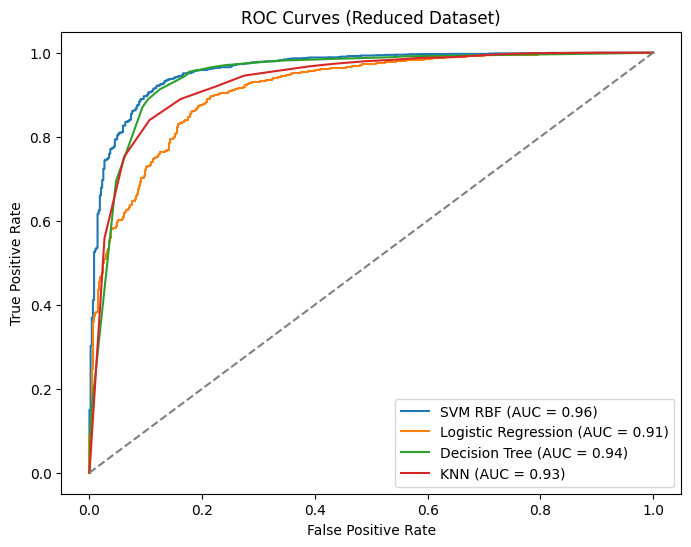

In [54]:
# Explanation:
# We plot ROC curves for Logistic Regression, Decision Tree, KNN, and SVM RBF,
# comparing their ability to distinguish between classes on the reduced dataset.


y_prob_logreg = logreg.predict_proba(X_test_red)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test_red, y_prob_logreg)
roc_auc_log = auc(fpr_log, tpr_log)


y_prob_dtree = dtree.predict_proba(X_test_red)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_red, y_prob_dtree)
roc_auc_dt = auc(fpr_dt, tpr_dt)


y_prob_knn = knn.predict_proba(X_test_red)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_red, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)


y_prob_svm = svm_rbf.predict_proba(X_test_red)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test_red, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM RBF (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Reduced Dataset)')
plt.legend()
plt.show()

# Explanation:
# The combined ROC plot visually compares each model's true positive vs. false positive rates.
# The AUC value summarizes each model's overall ranking performance across all thresholds.
